In [ ]:
#Exam 2 - Question 1
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn 
!pip install mglearn
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#importing data file(not cleaned)
df = pd.read_excel("Final Exam Q1 Data.xlsx")

In [3]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,No Cancel,128.0,Renew,1,2.7,1.0,265.1,110.0,89.0,9.87,10.0
1,No Cancel,107.0,Renew,1,3.7,1.0,161.6,123.0,82.0,9.78,13.7
2,No Cancel,137.0,Renew,0,0.0,0.0,243.4,114.0,52.0,6.06,12.2
3,No Cancel,84.0,No Renew,0,0.0,2.0,299.4,71.0,57.0,3.10,6.6
4,No Cancel,75.0,No Renew,0,0.0,3.0,166.7,113.0,41.0,7.42,10.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3332 non-null   object 
 1   AccountWeeks     3332 non-null   float64
 2   ContractRenewal  3332 non-null   object 
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3332 non-null   float64
 6   DayMins          3331 non-null   float64
 7   DayCalls         3332 non-null   float64
 8   MonthlyCharge    3330 non-null   float64
 9   OverageFee       3330 non-null   float64
 10  RoamMins         3330 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 286.6+ KB


In [5]:
#checking for NA vlaues 
df[df.isnull().any(axis=1)].head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
1726,NaN,NaN,NaN,0,0.00,1.0,131.7,108.0,41.0,10.83,11.0
1826,No Cancel,102.0,Renew,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN
1847,No Cancel,54.0,Renew,1,3.38,2.0,NaN,73.0,76.8,10.52,12.5
1859,No Cancel,116.0,Renew,0,0.00,0.0,164.6,110.0,NaN,NaN,NaN
1860,No Cancel,63.0,Renew,0,0.36,0.0,211.7,107.0,NaN,NaN,NaN


In [6]:
#Replacing Na values with means 
column_means = df.mean()
df = df.fillna(column_means)
df[df.isnull().any(axis=1)].head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
1726,NaN,101.080132,NaN,0,0.0,1.0,131.7,108.0,41.0,10.83,11.0


In [7]:
#Replacing catergorical missing values with 0 
df = df.fillna(0)
df[df.isnull().any(axis=1)].head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins


C:\Users\jcm_m\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AccountWeeks'>

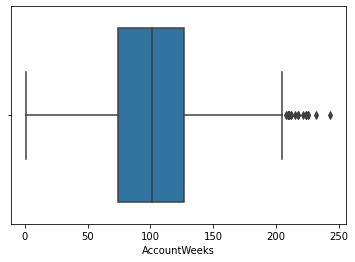

In [9]:
#Checking for outliers
sns.boxplot(df['AccountWeeks'])

C:\Users\jcm_m\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DataPlan'>

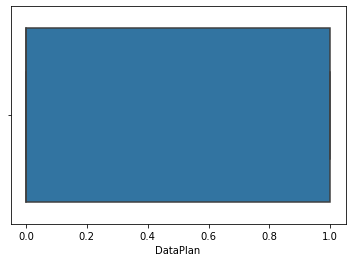

In [10]:
sns.boxplot(df['DataPlan'])

C:\Users\jcm_m\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DataUsage'>

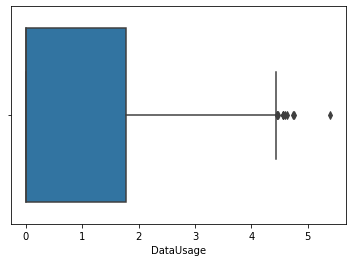

In [11]:
sns.boxplot(df['DataUsage'])

C:\Users\jcm_m\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustServCalls'>

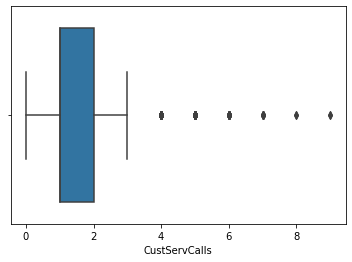

In [12]:
sns.boxplot(df['CustServCalls'])

C:\Users\jcm_m\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DayMins'>

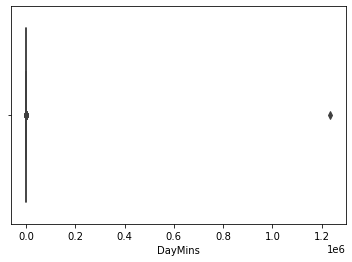

In [13]:
sns.boxplot(df['DayMins'])

C:\Users\jcm_m\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharge'>

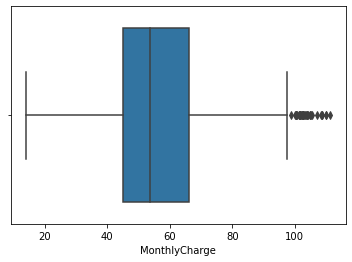

In [14]:
sns.boxplot(df['MonthlyCharge'])

C:\Users\jcm_m\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverageFee'>

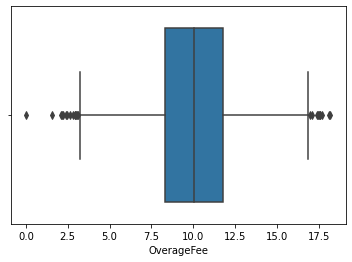

In [15]:
sns.boxplot(df['OverageFee'])

C:\Users\jcm_m\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RoamMins'>

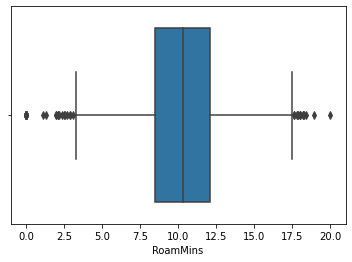

In [16]:
sns.boxplot(df['RoamMins'])

In [17]:
#Removing outliers 
df = df[df.AccountWeeks <= 200]
df = df[df.DataUsage <= 4.5]
df = df[df.CustServCalls <= 3]
df = df[df.DayMins <= 200000]
df = df[df.MonthlyCharge<=95]
df = df[df.OverageFee <= 17]
df = df[df.OverageFee >= 3]
df = df[df.RoamMins <= 17.5]
df = df[df.RoamMins >= 3]

In [18]:
#normalizing data
from sklearn import preprocessing
normalDF = ['AccountWeeks','DataPlan','DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']
names = df.columns
df[normalDF] = preprocessing.normalize(df[normalDF],axis=0)
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,No Cancel,0.022028,Renew,0.035692,0.034211,0.011352,0.026134,0.019865,0.028403,0.017652,0.017479
1,No Cancel,0.018414,Renew,0.035692,0.046882,0.011352,0.015931,0.022213,0.026169,0.017491,0.023946
2,No Cancel,0.023577,Renew,0.000000,0.000000,0.000000,0.023995,0.020587,0.016595,0.010838,0.021324
3,No Cancel,0.014456,No Renew,0.000000,0.000000,0.022705,0.029516,0.012822,0.018191,0.005544,0.011536
4,No Cancel,0.012907,No Renew,0.000000,0.000000,0.034057,0.016434,0.020407,0.013084,0.013270,0.017653


In [19]:
#Reclassifying categorical variables
df['Churn'] = df['Churn'].replace(['No Cancel'],1)
df['Churn'] = df['Churn'].replace(['Cancel'],0)
df['ContractRenewal'] = df['ContractRenewal'].replace(['Renew'],1)
df['ContractRenewal'] = df['ContractRenewal'].replace(['No Renew'],0)

In [20]:
#partitioning data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(df[['AccountWeeks','ContractRenewal','DataPlan','DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']],
                                                    df['Churn'],test_size=.3,random_state=12345)


In [21]:
#Developing range of KNN models 
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,20)
for n_neighbors in neighbors_settings:
    modelfit = KNeighborsClassifier(n_neighbors = n_neighbors)
    modelfit.fit(X_train,y_train)
    training_accuracy.append(modelfit.score(X_train, y_train))
    test_accuracy.append(modelfit.score(X_test, y_test))

Text(0.5, 0, '# of KNN')

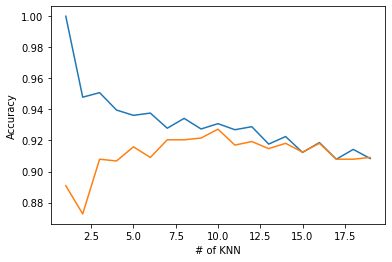

In [22]:
#plotting models 
plt.plot(neighbors_settings, training_accuracy, label = "Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("# of KNN")

In [23]:
#testing accuracy of best model 
modelfit = KNeighborsClassifier(n_neighbors = 10)
modelfit.fit(X_train, y_train)
print("Train set accuracy: ", modelfit.score(X_train,y_train))
print("Test set accuracy: ", modelfit.score(X_test,y_test))

Train set accuracy:  0.930832927423283
Test set accuracy:  0.9272727272727272


In [24]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)

In [25]:
#Testing for accuracy 
print("Training set score: ", logreg.score(X_train,y_train))
print("Test set score: ", logreg.score(X_test,y_test))

Training set score:  0.8879688261081344
Test set score:  0.8909090909090909


In [26]:
#decsion tree model 
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [27]:
#Testing for accuracy
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.938
Accuracy on test set: 0.932


In [28]:
#The KNN is the best model out of all three. This is because, the test and training set are very close to each other in terms
#of accuracy and they have relativley high percentage scores as well. While the decsion tree model has the highest training set
#score overall, the test and training set accuracies are further apart compared to the KNN, which could represent possible overfitting in the decision tree model.

In [29]:
#Question 2

In [30]:
#Importing data file (already cleaned)
df2 = pd.read_excel("Final Exam Q2 Data.xlsx")

In [31]:
df2.head()
df2.columns

Index(['ID', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [32]:
#partitioning data 
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2[['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young']],df2['Smiling'],test_size=.5,random_state=12345)

In [33]:
#Developing Range of KNN models 
training_accuracy2 = []
test_accuracy2 = []
neighbors_settings2 = range(1,20)
for n_neighbors in neighbors_settings2:
    modelfit = KNeighborsClassifier(n_neighbors = n_neighbors)
    modelfit.fit(X_train2,y_train2)
    training_accuracy2.append(modelfit.score(X_train2, y_train2))
    test_accuracy2.append(modelfit.score(X_test2, y_test2))

Text(0.5, 0, '# of KNN')

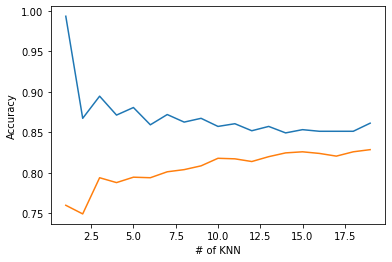

In [34]:
#plotting models 
plt.plot(neighbors_settings2, training_accuracy2, label = "Training Accuracy")
plt.plot(neighbors_settings2, test_accuracy2, label = "Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("# of KNN")

In [35]:
#knn results
modelfit2 = KNeighborsClassifier(n_neighbors = 14)
modelfit2.fit(X_train2, y_train2)
print("Train set accuracy: ", modelfit2.score(X_train2,y_train2))
print("Test set accuracy: ", modelfit2.score(X_test2,y_test2))

Train set accuracy:  0.8493333333333334
Test set accuracy:  0.8246666666666667


In [36]:
#logistic regression results
logreg2 = LogisticRegression().fit(X_train2, y_train2)
print("Training set score: ", logreg2.score(X_train2,y_train2))
print("Test set score: ", logreg2.score(X_test2,y_test2))

Training set score:  0.8613333333333333
Test set score:  0.8486666666666667


In [37]:
#decsion tree results
tree2 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree2.fit(X_train2, y_train2)
print("Accuracy on training set: {:.3f}".format(tree2.score(X_train2, y_train2)))
print("Accuracy on test set: {:.3f}".format(tree2.score(X_test2, y_test2)))

Accuracy on training set: 0.857
Accuracy on test set: 0.851
